## Import libraries and Read the data ##

In [1]:
import pandas as pd
import numpy as np

#read data
read_data = pd.read_csv("churn-bigml-80.csv",sep=',')
print("Shape of the data is:{shape}".format(shape=read_data.shape))

#print head
read_data.head()

Shape of the data is:(2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
#get column names
column_names = list(read_data.columns.values)
column_names

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

Removing the columns we dont need for training the model. In this dataset, column attributes like **State, Area Code, Total day calls, Total eve calls, Total night charge, Total intl charge** is unimportant. Adding this column will lead the model to overfit or underfit the data.

In [3]:
#columns to drop
columns_to_drop = ['State','Area code','Total day calls','Total eve calls','Total night charge','Total intl charge']
#create duplicate dataset
dup_df = read_data.drop(columns=columns_to_drop,axis=1)
dup_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,No,Yes,25,265.1,45.07,197.4,16.78,244.7,91,10.0,3,1,False
1,107,No,Yes,26,161.6,27.47,195.5,16.62,254.4,103,13.7,3,1,False
2,137,No,No,0,243.4,41.38,121.2,10.30,162.6,104,12.2,5,0,False
3,84,Yes,No,0,299.4,50.90,61.9,5.26,196.9,89,6.6,7,2,False
4,75,Yes,No,0,166.7,28.34,148.3,12.61,186.9,121,10.1,3,3,False


In [4]:
print("The Shape of the dataset after dropping the column is:{s}".format(s=dup_df.shape))

The Shape of the dataset after dropping the column is:(2666, 14)


Changing **Categorical data** into  **numerical data**.

In [5]:
#mapping the dataset
#change categorical data to numerical data
dup_df['International plan'] = dup_df["International plan"].apply({'Yes':1.0,'No':0.0}.get)
dup_df['Voice mail plan'] =  dup_df['Voice mail plan'].apply({'Yes':1.0,'No':0.0}.get)

dup_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0.0,1.0,25,265.1,45.07,197.4,16.78,244.7,91,10.0,3,1,False
1,107,0.0,1.0,26,161.6,27.47,195.5,16.62,254.4,103,13.7,3,1,False
2,137,0.0,0.0,0,243.4,41.38,121.2,10.30,162.6,104,12.2,5,0,False
3,84,1.0,0.0,0,299.4,50.90,61.9,5.26,196.9,89,6.6,7,2,False
4,75,1.0,0.0,0,166.7,28.34,148.3,12.61,186.9,121,10.1,3,3,False


In [6]:
#now get dataframe info
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 14 columns):
Account length            2666 non-null int64
International plan        2666 non-null float64
Voice mail plan           2666 non-null float64
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Customer service calls    2666 non-null int64
Churn                     2666 non-null bool
dtypes: bool(1), float64(8), int64(5)
memory usage: 273.4 KB


In [7]:
#output label is bool we need to convert into float
dup_df['Churn'] = dup_df['Churn'] * 1.0
dup_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0.0,1.0,25,265.1,45.07,197.4,16.78,244.7,91,10.0,3,1,0.0
1,107,0.0,1.0,26,161.6,27.47,195.5,16.62,254.4,103,13.7,3,1,0.0
2,137,0.0,0.0,0,243.4,41.38,121.2,10.30,162.6,104,12.2,5,0,0.0
3,84,1.0,0.0,0,299.4,50.90,61.9,5.26,196.9,89,6.6,7,2,0.0
4,75,1.0,0.0,0,166.7,28.34,148.3,12.61,186.9,121,10.1,3,3,0.0


In [8]:
#now data is ready and we need to feed the data into the model.
#create a tensorflow model to do the following
import tensorflow as tf

with tf.name_scope('inital_declaration'):
    a = tf.Variable(tf.random_normal(shape=[13,1]))
    b = tf.Variable(tf.random_normal(shape=[1,1]))
    
with tf.name_scope('input_variables'):
    X = tf.placeholder(tf.float32,shape=[None,13])
    Y = tf.placeholder(tf.float32,shape=[None,1])

#model you want to learn
model = tf.matmul(X,a) + b
model

c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [9]:
#declare loss function
#use sigmoid cross_entropy loss function
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=Y))

#declare number of parameters
lr = 0.003
b_size = 64
iter_num = 1500

#defining GradientDescentOptimizer
with tf.name_scope('optimizer'):
    opt = tf.train.GradientDescentOptimizer(lr)
    
#define the goal
goal = opt.minimize(loss)

#write the graph for predictions and accuracy
with tf.name_scope('model_metrics'):
    prediction = tf.round(tf.sigmoid(model))
    correct = tf.cast(tf.equal(prediction, Y),dtype=tf.float32)
    accuracy = tf.reduce_mean(correct)
    
#define variables that store results
loss_trace, train_acc, test_acc = [],[],[]

In [10]:
#start the session and run
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

#define the input and output variables from the dataset
input_data = dup_df.iloc[:,:-1]
target_data = dup_df.iloc[:,-1:]

print(input_data.shape,target_data.shape)

(2666, 13) (2666, 1)


In [11]:
#convert all data into float
input_data['Account length'] = input_data['Account length'].astype(float)
input_data['Number vmail messages'] = input_data['Number vmail messages'].astype(float)
input_data['Total night calls'] = input_data['Total night calls'].astype(float)
input_data['Total intl calls'] = input_data['Total intl calls'].astype(float)

input_data.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128.0,0.0,1.0,25.0,265.1,45.07,197.4,16.78,244.7,91.0,10.0,3.0,1
1,107.0,0.0,1.0,26.0,161.6,27.47,195.5,16.62,254.4,103.0,13.7,3.0,1
2,137.0,0.0,0.0,0.0,243.4,41.38,121.2,10.30,162.6,104.0,12.2,5.0,0
3,84.0,1.0,0.0,0.0,299.4,50.90,61.9,5.26,196.9,89.0,6.6,7.0,2
4,75.0,1.0,0.0,0.0,166.7,28.34,148.3,12.61,186.9,121.0,10.1,3.0,3


In [138]:
#save into csv file 
#input_data.to_csv('preprocessed_input_data.csv',sep=',',index=False)

In [12]:
#split the data into train and test
train_X, train_Y = input_data.iloc[:2000], target_data.iloc[:2000]
test_X, test_Y = input_data.iloc[2000:], target_data.iloc[2000:]

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(2000, 13) (2000, 1)
(666, 13) (666, 1)


In [13]:
train_X,test_X = train_X.values, test_X.values
train_Y,test_Y = train_Y.values, test_Y.values

print(type(train_X),type(train_Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
train_Y.dtype

dtype('float64')

In [15]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [16]:
#start training the model
for epoch in range(iter_num):
    #generate random batch
    b_index = np.random.choice(len(train_X),size=b_size)
    b_train_x = train_X[b_index]# shape is (64,13)
    b_train_y = np.matrix(train_Y[b_index]) #shape is (64,1) 
    #run the session
    sess.run(goal, feed_dict={X: b_train_x, Y: b_train_y})
    temp_loss = sess.run(loss, feed_dict={X:b_train_x, Y:b_train_y})
    
    #convert into matrix
    temp_train_acc = sess.run(accuracy, feed_dict={X: train_X, Y:np.matrix(train_Y)})
    temp_test_acc = sess.run(accuracy, feed_dict={X: test_X, Y:np.matrix(test_Y)})
    
    #recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    if (epoch + 1) % 200 == 0:
        print("Epoch:{e}, loss:{l}, Training Acc:{t_a}, Testing Accuracy:{te_a}".
             format(e=epoch+1,l=temp_loss, t_a=temp_train_acc, te_a = temp_test_acc))

Epoch:200, loss:0.4088810086250305, Training Acc:0.8399999737739563, Testing Accuracy:0.8198198080062866
Epoch:400, loss:0.48625677824020386, Training Acc:0.8500000238418579, Testing Accuracy:0.8288288116455078
Epoch:600, loss:0.466854989528656, Training Acc:0.8585000038146973, Testing Accuracy:0.8348348140716553
Epoch:800, loss:0.46850767731666565, Training Acc:0.8600000143051147, Testing Accuracy:0.8348348140716553
Epoch:1000, loss:0.47967529296875, Training Acc:0.8615000247955322, Testing Accuracy:0.8348348140716553
Epoch:1200, loss:0.3542545735836029, Training Acc:0.862500011920929, Testing Accuracy:0.8303303122520447
Epoch:1400, loss:0.38261425495147705, Training Acc:0.8629999756813049, Testing Accuracy:0.8288288116455078


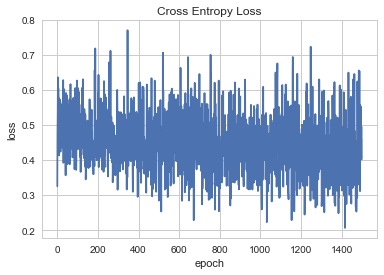

In [17]:
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

import matplotlib.pyplot as plt

#lets visualize the graph
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

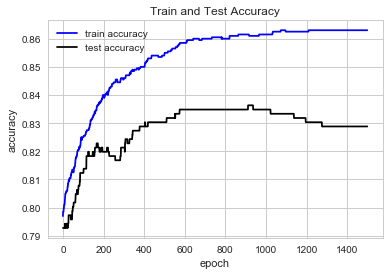

In [18]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [19]:
#add ops to save the tensorflow model
saver = tf.train.Saver()
# Save the variables to disk.
save_path = saver.save(sess, "saved_model/model.ckpt")
print("Model saved in path:{dir}".format(dir=save_path))

Model saved in path:saved_model/model.ckpt
